In [1]:
#1.1
import numpy as np
import matplotlib.pyplot as plt
def get_potential():
    mM= float(input("Enter mass of body M: "))
    if mM<0:
        print("Mass cannot be negative")
    else:
        xM= float(input("Enter x location of body M: "))
        yM= float(input("Enter y location of body M: "))
        x= float(input("Enter x location of evaluation point: "))
        y= float(input("Enter y location of evaluation point: "))
        G= 6.67e-11 
        U= -(G * mM) / np.sqrt((x-xM)**2 + (y-yM)**2)
        absU= np.abs(U)
        print(U)
    
get_potential()


Enter mass of body M:  1
Enter x location of body M:  2
Enter y location of body M:  3
Enter x location of evaluation point:  4
Enter y location of evaluation point:  5


-2.358201115257136e-11


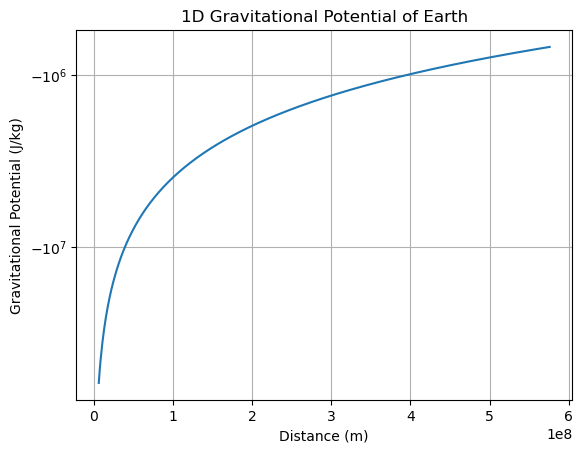

In [1]:
#1.2
import numpy as np
import matplotlib.pyplot as plt

class EarthPotential1D:
    def __init__(self, mass_earth, radius_earth, earth_moon_distance):
        self.mass_earth = mass_earth
        self.radius_earth = radius_earth
        self.earth_moon_distance = earth_moon_distance
        self.G = 6.67e-11

    def calculate_potential(self, distance):
        return -self.G * self.mass_earth / distance

    def plot_potential(self):
        distances = np.linspace(self.radius_earth, 1.5 * self.earth_moon_distance, 500)
        potentials = self.calculate_potential(distances)
        fig, ax = plt.subplots()
        ax.plot(distances, potentials)
        ax.set_xlabel("Distance (m)")
        ax.set_ylabel("Gravitational Potential (J/kg)")
        ax.set_yscale('symlog')
        ax.set_title("1D Gravitational Potential of Earth")
        ax.grid(True)
        plt.show()

mass_earth = 5.9e24
radius_earth = 6378e3
earth_moon_distance = 3.84e8
earth_potential_1d = EarthPotential1D(mass_earth, radius_earth, earth_moon_distance)
earth_potential_1d.plot_potential()


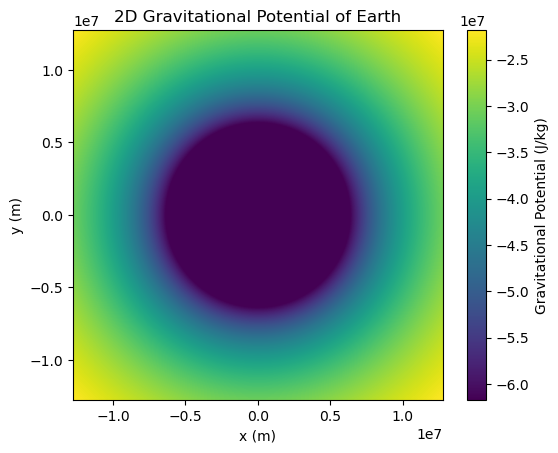

In [2]:
#1.3
import numpy as np
import matplotlib.pyplot as plt

class EarthPotential2D:
    def __init__(self, mass_earth, radius_earth, x_range, y_range):
        self.mass_earth = mass_earth
        self.radius_earth = radius_earth
        self.x_range = x_range
        self.y_range = y_range
        self.G = 6.67e-11

    def calculate_potential(self, X, Y):
        R = np.sqrt(X**2 + Y**2)
        return np.where(R > self.radius_earth, -self.G * self.mass_earth / R, -self.G * self.mass_earth / self.radius_earth)

    def plot_potential(self):
        x = np.linspace(self.x_range[0], self.x_range[1], 500)
        y = np.linspace(self.y_range[0], self.y_range[1], 500)
        X, Y = np.meshgrid(x, y)
        potential = self.calculate_potential(X, Y)
        fig, ax = plt.subplots()
        im = ax.imshow(potential, extent=[self.x_range[0], self.x_range[1], self.y_range[0], self.y_range[1]], origin='lower', cmap='viridis', aspect='equal')
        fig.colorbar(im, ax=ax, label='Gravitational Potential (J/kg)')
        ax.set_title("2D Gravitational Potential of Earth")
        ax.set_xlabel("x (m)")
        ax.set_ylabel("y (m)")
        plt.show()

mass_earth = 5.9e24
radius_earth = 6378e3
x_range = (-2 * radius_earth, 2 * radius_earth)
y_range = (-2 * radius_earth, 2 * radius_earth)
earth_potential_2d = EarthPotential2D(mass_earth, radius_earth, x_range, y_range)
earth_potential_2d.plot_potential()

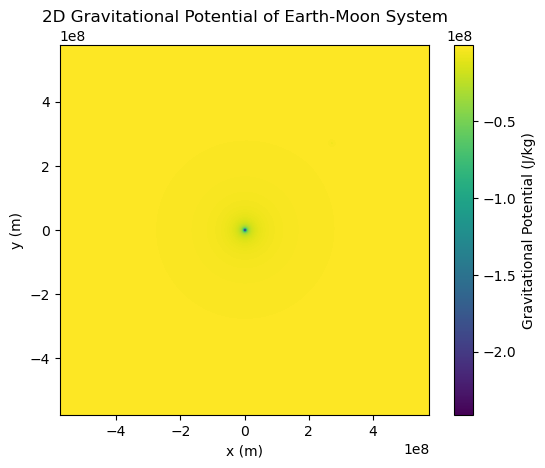

In [3]:
#2.1
import numpy as np
import matplotlib.pyplot as plt

class EarthMoonPotential2D:
    def __init__(self, mass_earth, mass_moon, earth_moon_distance, x_range, y_range):
        self.mass_earth = mass_earth
        self.mass_moon = mass_moon
        self.earth_moon_distance = earth_moon_distance
        self.x_range = x_range
        self.y_range = y_range
        self.G = 6.67e-11

    def calculate_potential(self, X, Y):
        R_earth = np.sqrt(X**2 + Y**2)
        R_moon = np.sqrt((X - self.earth_moon_distance / np.sqrt(2))**2 + (Y - self.earth_moon_distance / np.sqrt(2))**2)
        potential_earth = -self.G * self.mass_earth / R_earth
        potential_moon = -self.G * self.mass_moon / R_moon
        return potential_earth + potential_moon

    def plot_potential(self):
        x = np.linspace(self.x_range[0], self.x_range[1], 500)
        y = np.linspace(self.y_range[0], self.y_range[1], 500)
        X, Y = np.meshgrid(x, y)
        potential = self.calculate_potential(X, Y)
        fig, ax = plt.subplots()
        im = ax.imshow(potential, extent=[self.x_range[0], self.x_range[1], self.y_range[0], self.y_range[1]], origin='lower', cmap='viridis', aspect='equal')
        fig.colorbar(im, ax=ax, label='Gravitational Potential (J/kg)')
        ax.set_title("2D Gravitational Potential of Earth-Moon System")
        ax.set_xlabel("x (m)")
        ax.set_ylabel("y (m)")
        plt.show()

mass_earth = 5.9e24
mass_moon = 7.3e22
earth_moon_distance = 3.84e8
x_range = (-1.5 * earth_moon_distance, 1.5 * earth_moon_distance)
y_range = (-1.5 * earth_moon_distance, 1.5 * earth_moon_distance)
earth_moon_potential_2d = EarthMoonPotential2D(mass_earth, mass_moon, earth_moon_distance, x_range, y_range)
earth_moon_potential_2d.plot_potential()

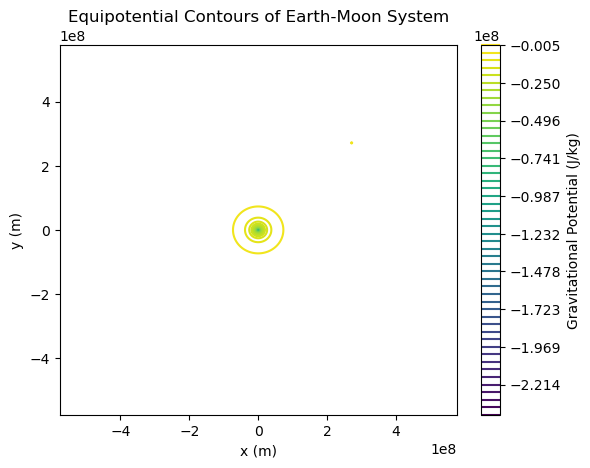

In [4]:
#2.2
import numpy as np
import matplotlib.pyplot as plt

class EarthMoonContours:
    def __init__(self, mass_earth, mass_moon, earth_moon_distance, x_range, y_range):
        self.mass_earth = mass_earth
        self.mass_moon = mass_moon
        self.earth_moon_distance = earth_moon_distance
        self.x_range = x_range
        self.y_range = y_range
        self.G = 6.67e-11

    def calculate_potential(self, X, Y):
        R_earth = np.sqrt(X**2 + Y**2)
        R_moon = np.sqrt((X - self.earth_moon_distance / np.sqrt(2))**2 + (Y - self.earth_moon_distance / np.sqrt(2))**2)
        potential_earth = -self.G * self.mass_earth / R_earth
        potential_moon = -self.G * self.mass_moon / R_moon
        return potential_earth + potential_moon

    def plot_contours(self):
        x = np.linspace(self.x_range[0], self.x_range[1], 500)
        y = np.linspace(self.y_range[0], self.y_range[1], 500)
        X, Y = np.meshgrid(x, y)
        potential = self.calculate_potential(X, Y)
        levels = np.linspace(np.min(potential), np.max(potential), 50)
        fig, ax = plt.subplots()
        contour = ax.contour(X, Y, potential, levels=levels, cmap='viridis')
        fig.colorbar(contour, ax=ax, label='Gravitational Potential (J/kg)')
        ax.set_title("Equipotential Contours of Earth-Moon System")
        ax.set_xlabel("x (m)")
        ax.set_ylabel("y (m)")
        plt.show()

mass_earth = 5.9e24
mass_moon = 7.3e22
earth_moon_distance = 3.84e8
x_range = (-1.5 * earth_moon_distance, 1.5 * earth_moon_distance)
y_range = (-1.5 * earth_moon_distance, 1.5 * earth_moon_distance)
earth_moon_contours = EarthMoonContours(mass_earth, mass_moon, earth_moon_distance, x_range, y_range)
earth_moon_contours.plot_contours()

In [6]:
#3.1
import numpy as np

class GravitationalForceCalculator:
    def calculate_force(self):
        mass1 = float(input("Enter mass of body 1 (kg): "))
        mass2 = float(input("Enter mass of body 2 (kg): "))
        x1 = float(input("Enter x location of body 1 (m): "))
        y1 = float(input("Enter y location of body 1 (m): "))
        x2 = float(input("Enter x location of body 2 (m): "))
        y2 = float(input("Enter y location of body 2 (m): "))
        G = 6.67e-11
        r_vector = np.array([x2 - x1, y2 - y1])
        r = np.linalg.norm(r_vector)
        if r == 0:
            return np.array([0, 0])
        force_magnitude = G * mass1 * mass2 / r**2
        force_direction = r_vector / r
        force_vector = force_magnitude * force_direction
        return force_vector

    def print_force(self):
        force = self.calculate_force()
        print(f"Force vector: {force} N")

force_calculator = GravitationalForceCalculator()
force_calculator.print_force()

Enter mass of body 1 (kg):  2
Enter mass of body 2 (kg):  4
Enter x location of body 1 (m):  6
Enter y location of body 1 (m):  8
Enter x location of body 2 (m):  1
Enter y location of body 2 (m):  3


Force vector: [-7.54624357e-12 -7.54624357e-12] N


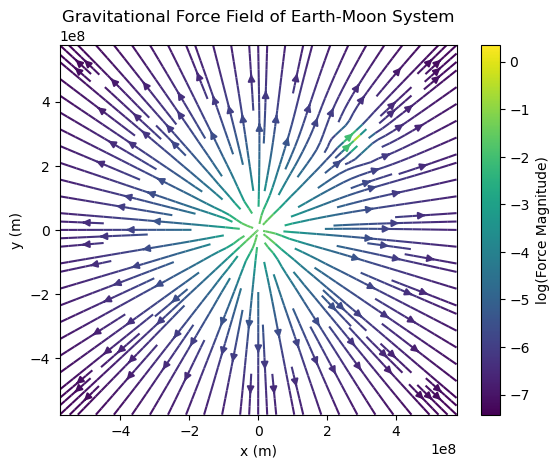

In [6]:
#3.2
import numpy as np
import matplotlib.pyplot as plt

class ForceFieldPlotter:
    def __init__(self, mass_earth, mass_moon, earth_moon_distance, x_range, y_range):
        self.mass_earth = mass_earth
        self.mass_moon = mass_moon
        self.earth_moon_distance = earth_moon_distance
        self.x_range = x_range
        self.y_range = y_range
        self.force_calculator = GravitationalForceCalculator()

    def plot_force_field(self):
        x = np.linspace(self.x_range[0], self.x_range[1], 20)
        y = np.linspace(self.y_range[0], self.y_range[1], 20)
        X, Y = np.meshgrid(x, y)
        Fx = np.zeros_like(X)
        Fy = np.zeros_like(Y)
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                force_earth = self.force_calculator.calculate_force(self.mass_earth, 1, 0, 0, X[i, j], Y[i, j])
                force_moon = self.force_calculator.calculate_force(self.mass_moon, 1, self.earth_moon_distance / np.sqrt(2), self.earth_moon_distance / np.sqrt(2), X[i, j], Y[i, j])
                total_force = force_earth + force_moon
                Fx[i, j] = total_force[0]
                Fy[i, j] = total_force[1]
        fig, ax = plt.subplots()
        stream = ax.streamplot(X, Y, Fx, Fy, density=1.5, color=np.log(np.sqrt(Fx**2 + Fy**2)))
        fig.colorbar(stream.lines, ax=ax, label='log(Force Magnitude)')
        ax.set_title("Gravitational Force Field of Earth-Moon System")
        ax.set_xlabel("x (m)")
        ax.set_ylabel("y (m)")
        plt.show()

mass_earth = 5.9e24
mass_moon = 7.3e22
earth_moon_distance = 3.84e8
x_range = (-1.5 * earth_moon_distance, 1.5 * earth_moon_distance)
y_range = (-1.5 * earth_moon_distance, 1.5 * earth_moon_distance)
force_field_plotter = ForceFieldPlotter(mass_earth, mass_moon, earth_moon_distance, x_range, y_range)
force_field_plotter.plot_force_field()

In [12]:
#4.1
class SaturnVStage1:
    def __init__(self, wet_mass, dry_mass, burn_rate, exhaust_velocity, g=9.81):
        self.wet_mass = wet_mass
        self.dry_mass = dry_mass
        self.burn_rate = burn_rate
        self.exhaust_velocity = exhaust_velocity
        self.g = g

    def calculate_burn_time(self):
        return (self.wet_mass - self.dry_mass) / self.burn_rate

wet_mass = float(input("Enter wet mass of Saturn V Stage 1 (kg): "))
dry_mass = float(input("Enter dry mass of Saturn V Stage 1 (kg): "))
burn_rate = float(input("Enter burn rate of Saturn V Stage 1 (kg/s): "))
exhaust_velocity = float(input("Enter exhaust velocity of Saturn V Stage 1 (m/s): "))

stage1 = SaturnVStage1(wet_mass, dry_mass, burn_rate, exhaust_velocity)
burn_time = stage1.calculate_burn_time()
print(f"Burn time: {burn_time} seconds")

Enter wet mass of Saturn V Stage 1 (kg):  2.8e6
Enter dry mass of Saturn V Stage 1 (kg):  7.5e5
Enter burn rate of Saturn V Stage 1 (kg/s):  1.3e4
Enter exhaust velocity of Saturn V Stage 1 (m/s):  2.4e3


Burn time: 157.69230769230768 seconds


In [10]:
#4.2
import numpy as np

class SaturnVStage1Velocity:
    def __init__(self, wet_mass, dry_mass, burn_rate, exhaust_velocity, g=9.81):
        self.wet_mass = wet_mass
        self.dry_mass = dry_mass
        self.burn_rate = burn_rate
        self.exhaust_velocity = exhaust_velocity
        self.g = g

    def calculate_burn_time(self):
        return (self.wet_mass - self.dry_mass) / self.burn_rate

    def calculate_delta_v(self, time):
        burn_time = self.calculate_burn_time()
        if time > burn_time:
            return 0
        mass = self.wet_mass - self.burn_rate * time
        return self.exhaust_velocity * np.log(self.wet_mass / mass) - self.g * time

wet_mass = float(input("Enter wet mass of Saturn V Stage 1 (kg): "))
dry_mass = float(input("Enter dry mass of Saturn V Stage 1 (kg): "))
burn_rate = float(input("Enter burn rate of Saturn V Stage 1 (kg/s): "))
exhaust_velocity = float(input("Enter exhaust velocity of Saturn V Stage 1 (m/s): "))
time = float(input("Enter time (s): "))

stage1_velocity = SaturnVStage1Velocity(wet_mass, dry_mass, burn_rate, exhaust_velocity)
delta_v = stage1_velocity.calculate_delta_v(time)
print(f"Change in velocity at time {time}: {delta_v} m/s")

Enter wet mass of Saturn V Stage 1 (kg):  2.8e6
Enter dry mass of Saturn V Stage 1 (kg):  7.5e5
Enter burn rate of Saturn V Stage 1 (kg/s):  1.3e4
Enter exhaust velocity of Saturn V Stage 1 (m/s):  2.4e3
Enter time (s):  60


Change in velocity at time 60.0: 195.05257384330753 m/s


In [13]:
#4.3
import numpy as np
from scipy.integrate import quad

class SaturnVStage1AltitudeCalc:
    def __init__(self, wet_mass_alt, dry_mass_alt, burn_rate_alt, exhaust_velocity_alt, g=9.81):
        self.wet_mass_alt = wet_mass_alt
        self.dry_mass_alt = dry_mass_alt
        self.burn_rate_alt = burn_rate_alt
        self.exhaust_velocity_alt = exhaust_velocity_alt
        self.g = g

    def calculate_burn_time_alt(self):
        return (self.wet_mass_alt - self.dry_mass_alt) / self.burn_rate_alt

    def calculate_delta_v_alt(self, time):
        burn_time_alt = self.calculate_burn_time_alt()
        if time > burn_time_alt:
            return 0
        mass_alt = self.wet_mass_alt - self.burn_rate_alt * time
        return self.exhaust_velocity_alt * np.log(self.wet_mass_alt / mass_alt) - self.g * time

    def calculate_altitude_alt(self):
        burn_time_alt = self.calculate_burn_time_alt()
        altitude_alt, _ = quad(self.calculate_delta_v_alt, 0, burn_time_alt)
        return altitude_alt

wet_mass_alt = float(input("Enter wet mass of Saturn V Stage 1 (kg): "))
dry_mass_alt = float(input("Enter dry mass of Saturn V Stage 1 (kg): "))
burn_rate_alt = float(input("Enter burn rate of Saturn V Stage 1 (kg/s): "))
exhaust_velocity_alt = float(input("Enter exhaust velocity of Saturn V Stage 1 (m/s): "))

stage1_altitude_alt = SaturnVStage1AltitudeCalc(wet_mass_alt, dry_mass_alt, burn_rate_alt, exhaust_velocity_alt)
altitude_alt = stage1_altitude_alt.calculate_altitude_alt()
print(f"Altitude at burnout: {altitude_alt} meters")

Enter wet mass of Saturn V Stage 1 (kg):  2.8e6
Enter dry mass of Saturn V Stage 1 (kg):  7.5e5
Enter burn rate of Saturn V Stage 1 (kg/s):  1.3e4
Enter exhaust velocity of Saturn V Stage 1 (m/s):  2.4e3


Altitude at burnout: 74093.98013366401 meters
